In [924]:
import pandas as pd
import chardet
from functools import reduce
import csv
import matplotlib.pyplot as plt


In [925]:
data = pd.read_csv("canalys_smartphone_model_level_estimates.csv")


C:\Users\Keshav Pathak\AppData\Local\Temp\ipykernel_11704\2557506963.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("canalys_smartphone_model_level_estimates.csv")


In [926]:
data

,Year,Quarter,Market,Vendor,Brand,OS,Network Generation,Screen size (inches),Currency,List price (local),Model,OS Variant,OS Version,Storage (GB),RAM (GB),Processor,Battery capacity (mAh),Units
0,2017,1,Indonesia,Acer,Acer,Android,3G,4.00,IDR,703886,Liquid Z220,Acer UI,Android 5.0,8.0,1,Snapdragon 200,2000,750
1,2017,1,Rest of Asia Pacific,Acer,Acer,Android,3G,4.00,USD,54,Liquid Z220,Acer UI,Android 5.0,8.0,1,Snapdragon 200,2000,20
2,2017,1,Ireland,Acer,Acer,Android,3G,4.50,EUR,416,Liquid Z320,Acer UI,Android 5.1,8.0,1,Snapdragon 427,2000,10
3,2017,1,UK,Acer,Acer,Android,3G,4.50,GBP,367,Liquid Z320,Acer UI,Android 5.1,8.0,1,Snapdragon 427,2000,80
4,2017,1,Rest of Asia Pacific,Acer,Acer,Android,3G,4.50,USD,54,Liquid Z320,Acer UI,Android 5.1,8.0,1,Snapdragon 427,2000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107835,2019,1,UK,ZTE,ZTE,Android,4G,6.21,GBP,461,Axon 9 Pro,Android,Android 8.0,128.0,6.0,Snapdragon 845,4000,513
107836,2019,1,Czech Republic,ZTE,ZTE,Android,4G,6.21,CZK,17887,Axon 9 Pro,Android,Android 8.0,128.0,6.0,Snapdragon 845,4000,1955
107837,2019,1,Mexico,ZTE,ZTE,Android,4G,6.26,MXN,4894,Blade V10 Vita,MiFavor 9.0,Android 8.3.1,32.0,2.0,SC9863A,3200,49488
107838,2019,1,People's Republic of China (mainland),ZTE,ZTE,Android,4G,6.30,CNY,1130,Blade V10,MiFavor 9.0,Android 8.3.1,64.0,4.0,Helio P70,3200,53360


In [927]:
data_1 = pd.read_csv("forex_rate.csv")


In [928]:
df2 = data[data.Brand.isin(['Xiaomi'])]

In [929]:
df4 = df2[df2.Year.isin([2017])]
df5 = df4[df4.Quarter.isin([4])]
df6 = df2[df2.Year.isin([2018])]
df7 = df6[df6.Quarter.isin([1])]
df8 = df6[df6.Quarter.isin([4])]
df9 = df2[df2.Year.isin([2019])]
df10 = df9[df9.Quarter.isin([1])]

final1 = df5.groupby('Market')['Units'].sum().reset_index(name= '2017 Q4')
#final1['Rank 2017 Q4'] = final1['2017 Q4'].rank(ascending=False)
final2 = df7.groupby('Market')['Units'].sum().reset_index(name= '2018 Q1')
#final2['Rank 2018 Q1'] = final2['2018 Q1'].rank(ascending=False)
final3 = df8.groupby('Market')['Units'].sum().reset_index(name= '2018 Q4')
#final3['Rank 2018 Q4'] = final3['2018 Q4'].rank(ascending=False)
final4 = df10.groupby('Market')['Units'].sum().reset_index(name= '2019 Q1')
#final4['Rank 2019 Q1'] = final4['2019 Q1'].rank(ascending=False)
#final4 = final4.drop(final4.index[final4['Rank 2019 Q1'] > 5], inplace=True)
#final4 = final4[final4['Rank 2019 Q1'] < 6]


In [930]:
dfs = [final1, final2, final3, final4]

In [931]:
#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Market'],how='outer'), dfs)
final_df = final_df.fillna('0')
merged = pd.merge(data_1, final_df, on ='Market', how ="inner")
merged = merged.drop(['Currency', 'Exchange rate', 'VAT'], axis=1)  
#merged1 = merged.to_csv(r'C:\Users\Keshav Pathak\Desktop\finalXiaomi1.csv', index = False, header=True)

# Total units sold in each country of Xiaomi mobiles

In [932]:
merged

,Region,Sub-region,Market,2017 Q4,2018 Q1,2018 Q4,2019 Q1
0,Asia Pacific (excludes Greater China),Asia Pacific (excludes Greater China),Bangladesh,81657.0,61458.0,23223.0,3078.0
1,Asia Pacific (excludes Greater China),Asia Pacific (excludes Greater China),Cambodia,0,0,20281.0,15526.0
2,Asia Pacific (excludes Greater China),Asia Pacific (excludes Greater China),India,8131714.0,9070245.0,9937345.0,1041455.0
3,Asia Pacific (excludes Greater China),Asia Pacific (excludes Greater China),Indonesia,813366.0,1674231.0,1947042.0,159570.0
4,Asia Pacific (excludes Greater China),Asia Pacific (excludes Greater China),Laos,0,0,0,8505.0
...,...,...,...,...,...,...,...
56,Greater China,Greater China,Taiwan,80660.0,77714.0,68873.0,21405.0
57,Latin America,Latin America,Chile,39985.0,15620.0,9620.0,1053.0
58,Latin America,Latin America,Colombia,48776.0,61527.0,71359.0,23592.0
59,Latin America,Latin America,Mexico,61653.0,50129.0,77490.0,0


#  countries with most units in 2018 quarter1

In [933]:
df4 = final3.set_index('Market', inplace=True)

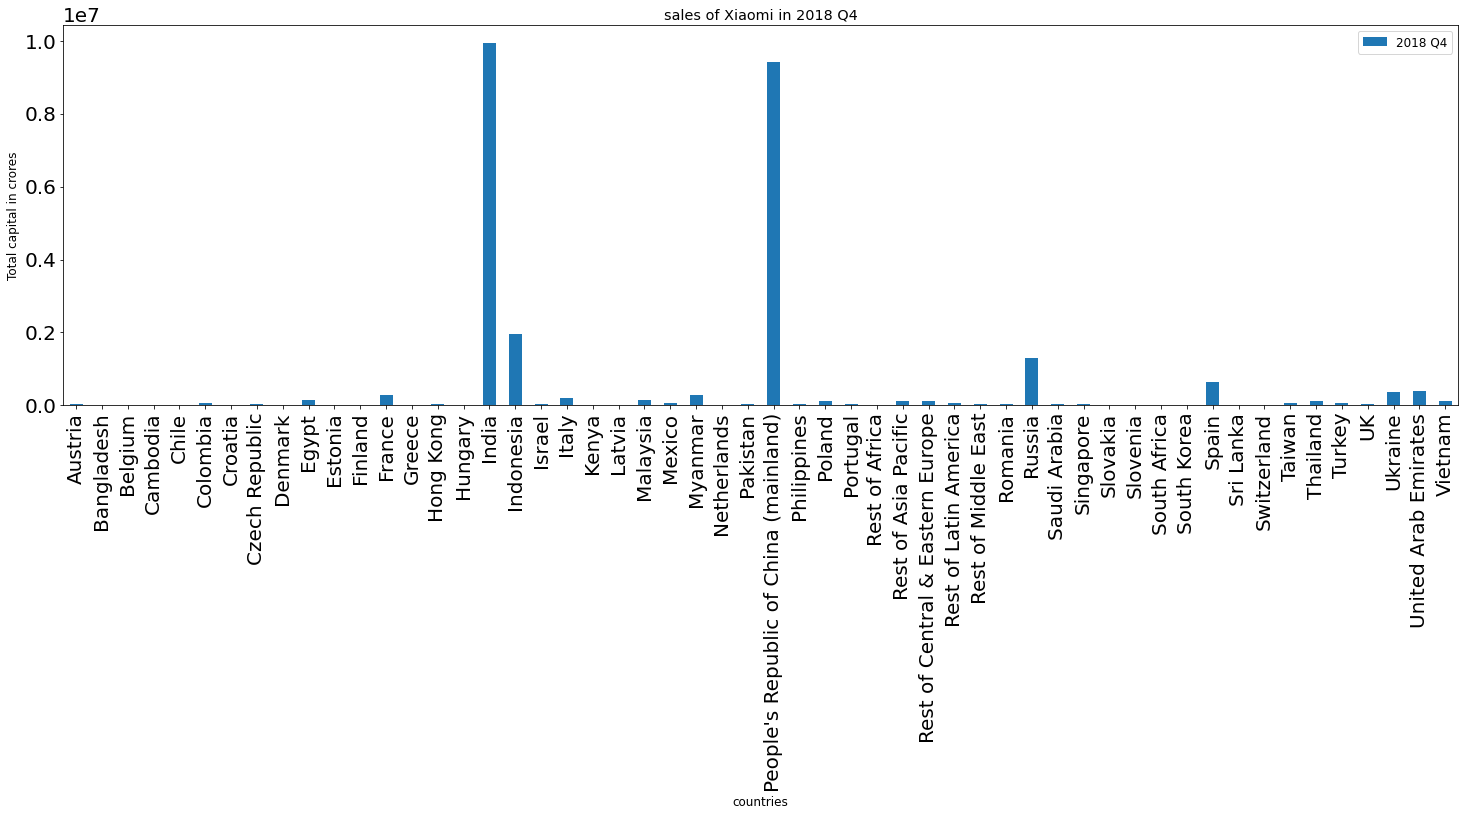

In [934]:
final3.plot(kind='bar', title='sales of Xiaomi in 2018 Q4',ylabel='Total capital in crores', xlabel='countries', figsize=(25, 7))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=25) 

In [935]:
#merged1 = merged.sort_values(by=['Rank 2019 Q1'], ascending=True)

In [936]:
#final4.describe()

In [937]:
final4 = final4.sort_values(by=['2019 Q1'], ascending=False)

In [938]:
final4 = final4.head(5)

In [939]:
df5 = final4.set_index('Market', inplace=True)

# Top 5 countries with most unit sold in 2019 quarter1.

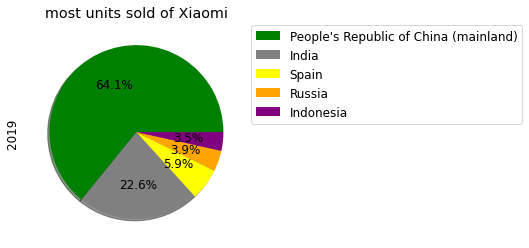

In [940]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=12) 
colors = ['green', 'grey', 'yellow','orange','purple']
data = final4["2019 Q1"]
ax = data.plot(kind="pie",y = '2019 Q1' ,autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='most units sold of Xiaomi', ylabel='2019 ', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# 